In [3]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Loading Dataset

df = pd.read_csv('C:/Users/msnla/Desktop/scores_data.csv')

In [9]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (149, 3)


,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB
None


In [13]:
# Column Names

print(df.columns.tolist())

['Batch ', 'User_ID ', '   Score   ']


In [14]:
# Removing Spaces

df.columns = df.columns.str.strip()

In [15]:
# Data Understanding

print("Unique Batches:", df['Batch'].unique())
print("Total Students:", df['User_ID'].nunique())

Unique Batches: ['AI_ELITE_7' 'AI_ELITE_6' 'AI_ELITE_4']
Total Students: 149


In [16]:
df.isnull().sum()

Batch      0
User_ID    0
Score      0
dtype: int64

In [17]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


### Univariate Analysis

In [22]:
# Frequency count of batches
batch_count = df['Batch'].value_counts()
print(batch_count)

Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64


In [23]:
# Percentage distribution
batch_percentage = df['Batch'].value_counts(normalize=True) * 100
print(batch_percentage)

Batch
AI_ELITE_7    35.570470
AI_ELITE_6    32.214765
AI_ELITE_4    32.214765
Name: proportion, dtype: float64


In [25]:
print("Duplicate User IDs:", df['User_ID'].duplicated().sum())

Duplicate User IDs: 0


In [28]:
df[['Marks_Obtained', 'Total_Marks']] = df['Score'].str.split('/', expand=True)

df['Marks_Obtained'] = df['Marks_Obtained'].astype(int)
df['Total_Marks'] = df['Total_Marks'].astype(int)

In [29]:
df['Marks_Obtained'].describe()

count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Marks_Obtained, dtype: float64

In [30]:
mean_score = df['Marks_Obtained'].mean()
median_score = df['Marks_Obtained'].median()
mode_score = df['Marks_Obtained'].mode()

print("Mean:", mean_score)
print("Median:", median_score)
print("Mode:", mode_score.tolist())

Mean: 4.382550335570469
Median: 4.0
Mode: [4]


In [31]:
print("Variance:", df['Marks_Obtained'].var())
print("Standard Deviation:", df['Marks_Obtained'].std())
print("Range:", df['Marks_Obtained'].max() - df['Marks_Obtained'].min())

Variance: 2.5350988572465076
Standard Deviation: 1.5921993773540133
Range: 7


In [32]:
score_freq = df['Marks_Obtained'].value_counts().sort_index()
print(score_freq)

Marks_Obtained
0     2
1     3
2    12
3    24
4    40
5    32
6    18
7    18
Name: count, dtype: int64


In [33]:
print("Skewness:", df['Marks_Obtained'].skew())
print("Kurtosis:", df['Marks_Obtained'].kurt())

Skewness: -0.1797425271078158
Kurtosis: -0.2387457504391124


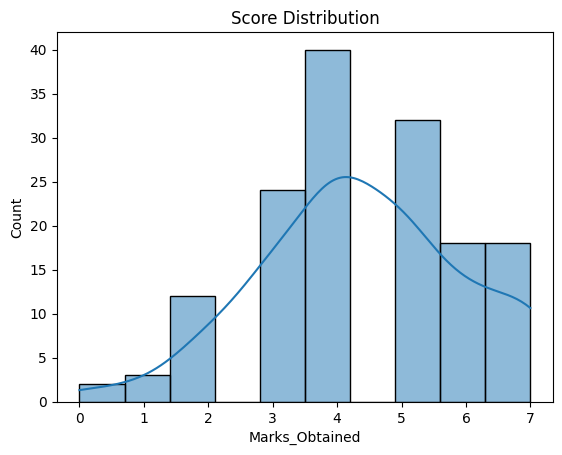

In [34]:
# Histogram
sns.histplot(df['Marks_Obtained'], kde=True)
plt.title("Score Distribution")
plt.show()

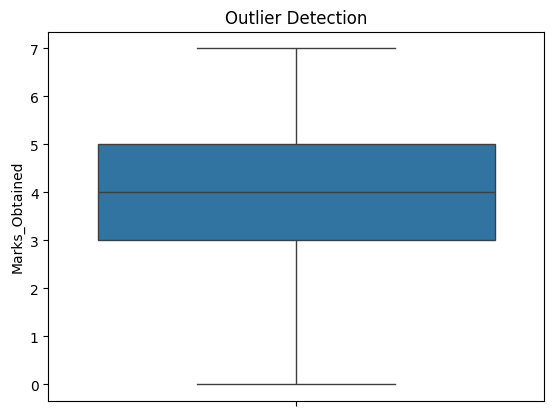

In [35]:
# Boxplot
sns.boxplot(y=df['Marks_Obtained'])
plt.title("Outlier Detection")
plt.show()

### Bi-variate Analysis

In [36]:
df.columns = df.columns.str.strip()

In [37]:
df['Score_Numeric'] = df['Score'].str.split('/').str[0].astype(int)

In [38]:
# Batch-wise Average Score

batch_avg = df.groupby('Batch')['Score_Numeric'].mean()
print(batch_avg)

Batch
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Score_Numeric, dtype: float64


In [39]:
# Batch-wise Median Score

batch_median = df.groupby('Batch')['Score_Numeric'].median()
print(batch_median)

Batch
AI_ELITE_4    4.0
AI_ELITE_6    4.0
AI_ELITE_7    5.0
Name: Score_Numeric, dtype: float64


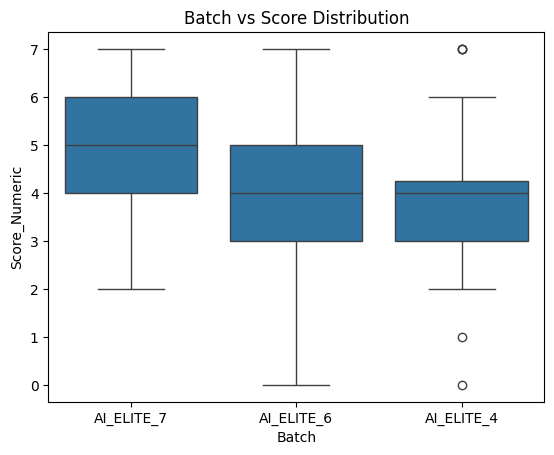

In [40]:
# Boxplot
sns.boxplot(data=df, x='Batch', y='Score_Numeric')
plt.title("Batch vs Score Distribution")
plt.show()

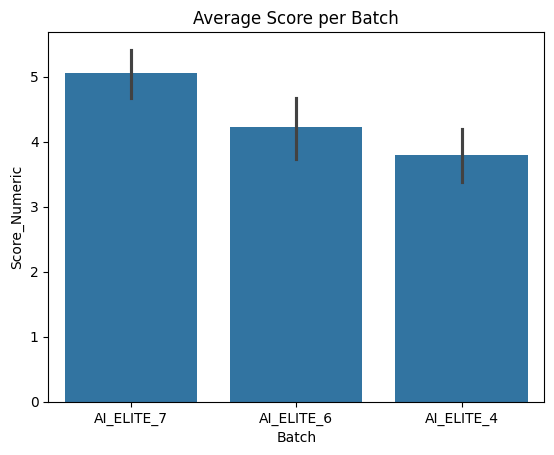

In [41]:
# Bar plot (mean)
sns.barplot(data=df, x='Batch', y='Score_Numeric')
plt.title("Average Score per Batch")
plt.show()